In [1]:
# import the package
import pandas as pd

In [2]:
#import our data into the dataframe
loan = pd.read_csv("loan.csv")

In [3]:
loan.head()

,Income,Loan Amount,Default
0,15,8,No
1,30,8,No
2,5,9,Yes
3,22,10,No
4,33,12,No


In [4]:
# Explore data
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Income       30 non-null     int64 
 1   Loan Amount  30 non-null     int64 
 2   Default      30 non-null     object
dtypes: int64(2), object(1)
memory usage: 852.0+ bytes


In [5]:
# Prepare Data
#create a pandas Series called y for the dependent vaiable. 
y=loan['Default']

In [6]:
loan.describe()

,Income,Loan Amount
count,30.000000,30.000000
mean,18.766667,51.966667
std,8.572946,34.055212
min,5.000000,8.000000
25%,13.000000,21.250000
50%,18.000000,49.000000
75%,25.500000,79.500000
max,34.000000,110.000000


In [7]:
#Boxplot
from matplotlib import pyplot as plt
import seaborn as sns

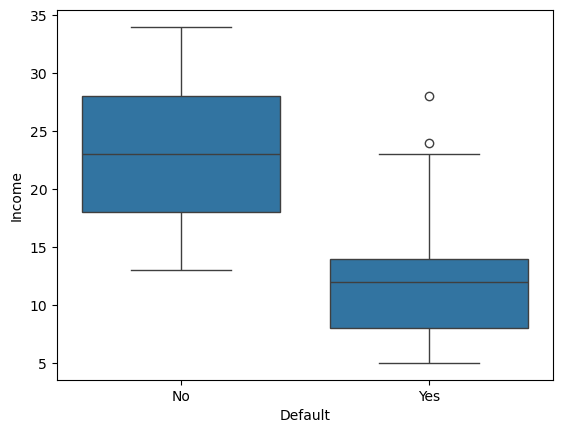

In [9]:
ax = sns.boxplot(data=loan, x='Default', y='Income')

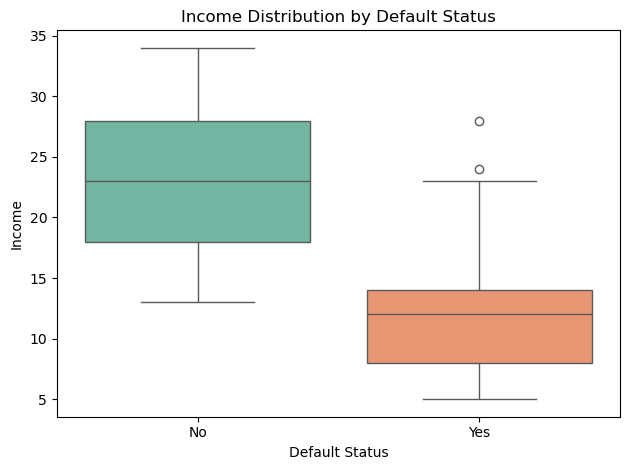

In [13]:
# Adding color customization to the boxplot
ax = sns.boxplot(data=loan, x='Default', y='Income', hue='Default', palette='Set2')  # Using 'Set2' color palette

# Alternative with more customization options
# ax = sns.boxplot(data=loan, x='Default', y='Income', palette={'Yes': 'salmon', 'No': 'skyblue'})  # Custom colors for each category

# Make the plot more visually appealing
plt.title('Income Distribution by Default Status')
plt.xlabel('Default Status')
plt.ylabel('Income')

# Display the plot
plt.tight_layout()
plt.show()

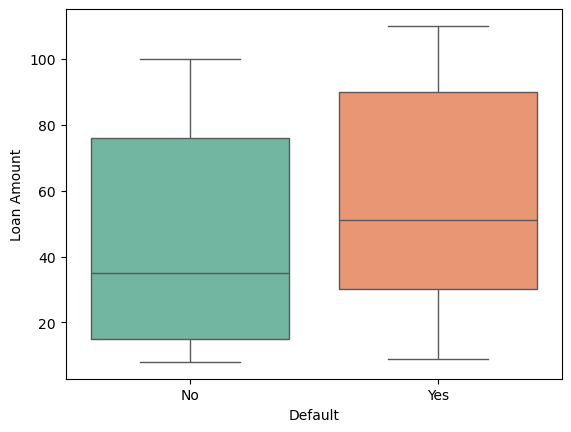

In [23]:
ax = sns.boxplot(data=loan, x='Default', y='Loan Amount', hue='Default', palette='Set2', legend=False) 

In [24]:
# ScatterPlot
import numpy as np

# Assistant
The selected code creates a scatter plot to visualize the relationship between loan amounts and loan default outcomes. Here's a step-by-step explanation:

1. `sns.scatterplot()` - This function from the Seaborn library creates a scatter plot.

2. `x=loan['Loan Amount']` - Sets the x-axis values to be the "Loan Amount" column from the loan dataframe.

3. `y = np.where(loan['Default'] =='No',0,1)` - Creates the y-axis values by:
   - Using NumPy's `where()` function to convert the categorical "Default" column into binary values
   - Assigning 0 when "Default" is "No" (loan not defaulted)
   - Assigning 1 when "Default" is anything else (loan defaulted)

4. `s=150` - Sets the size of each scatter point to 150, making them larger than the default size.

5. `ax =` - Captures the returned Axes object, which can be used for further customization of the plot.

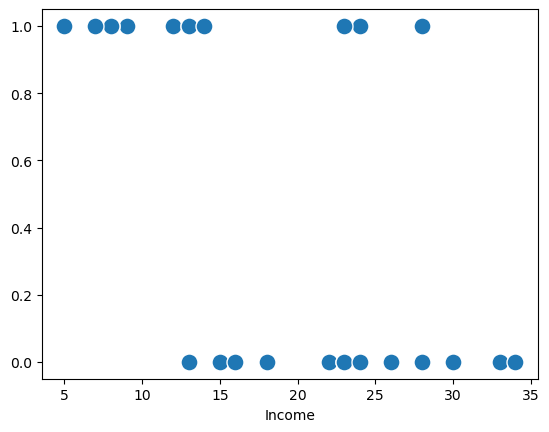

In [17]:
# relationships between the income and loan outcomes
ax = sns.scatterplot(x = loan['Income'],y =np.where(loan['Default'] == 'No',0,1),s= 150)

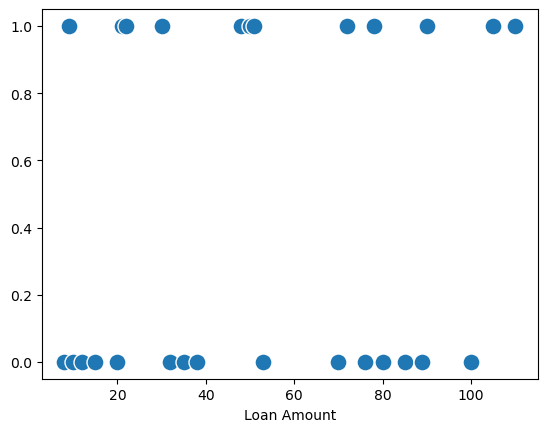

In [20]:
#describe the relationship between amount borrored and loan outcomes
ax = sns.scatterplot(x=loan['Loan Amount'], y = np.where(loan['Default'] =='No',0,1),s =150)

In [21]:
#Prepare the Data
#Create y for the dependent variable
y = loan['Default']

# Assistant
The selected code creates a new DataFrame called `x` by extracting two specific columns from an existing DataFrame called `loan`.

Here's what this line does:
- `loan[['Income','Loan Amount']]` - This selects two columns ('Income' and 'Loan Amount') from the `loan` DataFrame using double square brackets notation, which returns a DataFrame rather than a Series
- `x = ` - The resulting subset of data is assigned to a new variable named `x`
- The comment `#dataframe` indicates that the result is a DataFrame object

This is likely being done to prepare these two variables for use in a machine learning model or statistical analysis, where 'Income' and 'Loan Amount' will serve as features or variables of interest.

In [29]:
X= loan[['Income','Loan Amount']]

# Assistant
The selected code uses scikit-learn's train_test_split function to divide data into training and testing sets. Here's a step-by-step explanation:

1. `from sklearn.model_selection import train_test_split` - Imports the train_test_split function from scikit-learn's model_selection module.

2. `X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,stratify=y,random_state=123)` - Splits the data with these parameters:
   - `X` and `y`: The input features and target variables to be split
   - `train_size=0.7`: Allocates 70% of the data to the training set
   - `stratify=y`: Ensures that the class distribution in the target variable is preserved in both training and testing sets
   - `random_state=123`: Sets a seed for reproducible results

The function returns four arrays that are assigned to X_train, X_test, y_train, and y_test variables.

In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size =0.7,stratify = y, random_state =123)

In [31]:
X_train.shape

(21, 2)

In [32]:
X_test.shape

(9, 2)

Train and Evaluate the Model

In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
# instantiate a new object called classifier from the LogisticRegression class
classifier = LogisticRegression()

In [36]:
# train a model
model = classifier.fit(X_train, y_train)

There are 9 instances in the test set. To predict labels for the test instances, we pass the independent variables of the test set (X_test) to the predict() method of the model.

In [37]:
model.predict(X_test)

array(['Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No'],
      dtype=object)

To evaluate how accurate our model is ,we pass the test data to the score() method of the model

In [38]:
model.score(X_test,y_test)

0.5555555555555556

The result tells us that our Logistic Regression model is able to corretly predict 5 out of 9 (or 56%) of the labels in the test set. The accuracy of a model only gives us a one-dim perspective of performance. To get  a broader perspective, we need to generate a confusion(or error ) matrix of the model's performance. 
To do this, we need ot import confusion_matrix func from thesklearn.metrics subpackage.

In [39]:
from sklearn.metrics import confusion_matrix

In [42]:
# Assistant
# Calculate and display the confusion matrix to evaluate model performance
# - y_test contains the actual target values
# - model.predict(X_test) generates predictions on the test data
# The confusion matrix shows true positives, false positives, true negatives, and false negatives
confusion_matrix(y_test, model.predict(X_test))

array([[1, 4],
       [0, 4]])

The result is a 2*2 array that shows how many instances the model predicted correctly or incorrectly as either Yes or No. This confusion matrix can be illustated as : The first row of the matrix shows that the 5 instances that were actually No, the model predicted 1 of them as No but 4 of them as Yes. The second row of the matrix shows that of the 4 instances that were actually Yes, the model predicted all 4 correctly as Yes.

## Interpret the Model

In [43]:
# To get the intercept , we refer to the intercept_ attribute of our model.
model.intercept_

array([1.09296146])

In [ ]:
# To get the other model coef , we refer to the coef_ attribute of our model

In [44]:
model.coef_

array([[-0.13890275,  0.02778433]])

The model coef correspond to the order in which the independent variables are listed int he training data. This means that the equation for our Logistic Regression model can be written as :
log(P/(1-P) = 1.09296146 - 0.13890275 *Income + 0.02778433 * Loan Amount
To make our coef easier to work with ,let's convert the coef from a 2-dim array to a one-dim array and round the values to two decimal places.

In [45]:
log_odds = np.round(model.coef_[0],2)
log_odds

array([-0.14,  0.03])

In [46]:
# create a pandas Dataframe using the coef values and the cluumn names fromt he training data as row indexes:
pd.DataFrame({'log odds': log_odds},index = X.columns)

,log odds
Income,-0.14
Loan Amount,0.03


The first coef tells us that , when all other variables are held constand, a $1 increase in a borrowers income decreases the log odds that they will default on their loan by 0.14 .Likewise, the second coef shows that a $1 increase in the amount a customer borrows, increases the log odds that they will default on their loan by 0.03 when all other vairables are held constant.
Let's exponentiate the coef so we can interpret them in terms of odds rather than log odds:

In [47]:
odds = np. round(np.exp(log_odds),2)
pd.DataFrame({'odd':odds},index = X.columns)

,odd
Income,0.87
Loan Amount,1.03


In [48]:
# Assistant
# Convert log odds to odds ratios by exponentiating and round to 2 decimal places
odds = np.round(np.exp(log_odds), 2)
# Create a DataFrame to display the odds ratios with feature names as index
pd.DataFrame({'odd': odds}, index=X.columns)

,odd
Income,0.87
Loan Amount,1.03


In [50]:
# Assistant explaination
# Convert log odds to odds ratios by exponentiating and round to 2 decimal places
odds = np.round(np.exp(log_odds), 2)
# Create a DataFrame to display the odds ratios with feature names as index
# Values < 1 indicate decreased odds of default (e.g., 0.87 means 13% decrease)
# Values > 1 indicate increased odds of default (e.g., 1.03 means 3% increase)
# For example: higher income reduces default odds, while higher loan amounts increase default odds
pd.DataFrame({'odd': odds}, index=X.columns)

,odd
Income,0.87
Loan Amount,1.03


The first coef tells us that for every $1 increase in a borrowers income,the odds that they will default on their loan reduces by 13%(1-0.87) when all other variables are held constant. .Likewise, the second coef shows that a $1 increase in the amount a customer borrows, increases the odds that they will default on their loan by 3%(1.03-1), (or the odds that a borrow will default on their loan increases by a factor of 1.03) when all other vairables are held constant.  Borrow moe moeny increases the odds of default. 